# Decision Tree  Classifier model

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('D:\salaries.csv')
df

,company,job,degree,salary_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [68]:
target = df['salary_100k']
#del df['salary>100k']

In [69]:
inputs = df.drop('salary_100k',axis = 1)

In [70]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [71]:
#One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
le_company = le_job = le_degree = LabelEncoder()

In [72]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [73]:
#1,2-google,sales,    #1-fb,programmer,master

inputs_n = inputs.drop(['job','degree','company'], axis = 'columns')
inputs_n


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [74]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(inputs_n,target,test_size = 0.2)

In [75]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [76]:
model.predict(xtt)

array([1, 1, 1, 1], dtype=int64)

In [77]:
model.score(xtt,ytt)

1.0

# SVM classifier with Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
a = pd.DataFrame(iris.data, columns = iris.feature_names)
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
a['target'] = iris.target
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
a[a.target ==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [7]:
a['flower_name'] = a.target.apply(lambda x : iris.target_names[x])
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df0 = a[a.target==0]
df1 = a[a.target==1]
df2 = a[a.target==2]

In [10]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


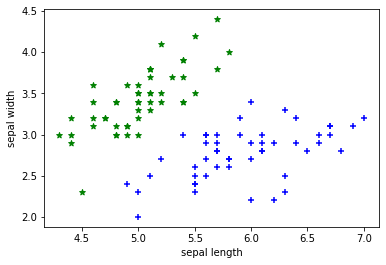

In [11]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green', marker = '*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue', marker = '+')

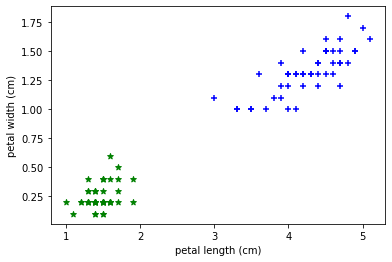

In [13]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green', marker = '*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue', marker = '+')

In [45]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(x,y,test_size =0.2)

In [46]:
y = a['target']
x = a.drop(['target','flower_name'],axis = 'columns')

In [35]:
from sklearn.svm import SVC
model = SVC()
model.fit(xt,yt)

SVC()

In [37]:
model.score(xtt,ytt)

0.9333333333333333

In [41]:
model_c =SVC(C=1)
model_c.fit(xt,yt)
model_c.score(xtt,ytt)

0.9333333333333333

In [47]:
mc = SVC(C=10)
mc.fit(xt,yt)
mc.score(xtt,ytt)

1.0

In [51]:
mg = SVC(kernel ='linear')
mg.fit(xt,yt)
mg.score(xtt,ytt)

1.0